In [1]:
from astropy.io import fits
from sklearn.model_selection import train_test_split
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

Moves all the science files and then the cosmic ray masks, then finally the ignore masks.

In [2]:
science_files = glob.glob(os.path.join(os.curdir, "*", "*_flt.fits"))
save_loc = "./data/images/"

if not os.path.exists(save_loc):
    os.makedirs(save_loc)
    
for im in science_files:
    root = im.split('/')[-1]
    shutil.copyfile(im, save_loc + root)

In [3]:
science_files = glob.glob(os.path.join(os.curdir,"*", "*sci1_crmask.fits"))
save_loc = "./data/masks/"

if not os.path.exists(save_loc):
    os.makedirs(save_loc)
    
for im in science_files:
    root = im.split('/')[-1]
    shutil.copyfile(im, save_loc + root)

In [4]:
science_files = glob.glob(os.path.join(os.curdir, "Drizzle Notebooks", "*", "*sci1_single_mask.fits"))
save_loc = "./data/ignore/"

if not os.path.exists(save_loc):
    os.makedirs(save_loc)
    
for im in science_files:
    root = im.split('/')[-1]
    shutil.copyfile(im, save_loc + root)

Plotting a section of one of the images just to test.

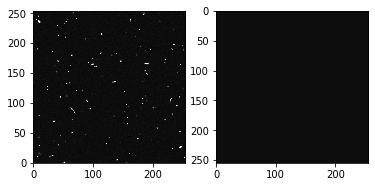

In [5]:
sci = fits.getdata(os.path.join(os.curdir, "data", "images", "jbit11dsq_flt.fits"))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(sci[0:255, 0:255], vmin = 0, vmax = 1000, cmap="gray", origin='lower')
ax[1].imshow(np.full_like(sci[0:255, 0:255], np.median(sci)),vmin = 0, vmax = 1000, cmap="gray")

Creates a concatenated stack of all the 256x256 square images.

In [6]:
def get_images(image_names):
    big = []
    big_mask = []
    big_ignore = []
    
    # Loop over the list of image names and extract all the full names
    for n in image_names:
        image_files = glob.glob(os.path.join(os.curdir, "data", "images", n + "*_flt.fits"))
        for name in image_files:
            
            name = name.split("/")[-1].split("flt")[0]
            
            # Loads the image, then loads the corresponding CR mask.
            working = fits.getdata(os.path.join(os.curdir, "data", "images", name + "flt.fits"))
            working_mask = fits.getdata(os.path.join(os.curdir, "data", "masks", name + "sci1_crmask.fits")) == 0
            working_ignore = fits.getdata(os.path.join(os.curdir, "data", "ignore", name + "sci1_single_mask.fits")) == 0
            
            # Loops over the image and slices it up into 256x256 squares.
            for i in range(128, working.shape[0] - 128, 256):
                for j in range(128, working.shape[1] - 128, 256):
                    big.append(working[i:i+256, j:j+256].reshape(1, 256, 256))
                    big_mask.append(working_mask[i:i+256, j:j+256].reshape(1, 256, 256))
                    
                    temp_ignore = working_ignore[i:i+256, j:j+256].reshape(1, 256, 256)
                    big_ignore.append(temp_ignore)
                    
            for i in range(256, working.shape[0] - 255, 256):
                for j in range(256, working.shape[1] - 255, 256):
                    big.append(working[i:i+256, j:j+256].reshape(1, 256, 256))
                    big_mask.append(working_mask[i:i+256, j:j+256].reshape(1, 256, 256))
                    
                    temp_ignore = working_ignore[i:i+256, j:j+256].reshape(1, 256, 256)
                    big_ignore.append(temp_ignore)
            #print(len(big))
            
    # Concatenates the images into nice numpy arrays
    big = np.concatenate(big)
    big_mask = np.concatenate(big_mask)
    big_ignore = np.concatenate(big_ignore)
    
    return (big, big_mask, big_ignore)

In [7]:
test_size = 0.29 # So I can change all of them at once.

# Extragalactic field
# eg_test_names = ["j9700", "jbit1", "jcoz44"]
# eg_data, eg_masks, eg_ignore = get_images(eg_field_names)

# Arrays of 3 in order: image, mask, ignore
eg_train = [0,0,0]
eg_train_names = ["j9700", "jbit1"]
eg_train[0], eg_train[1], eg_train[2] = get_images(eg_train_names)

eg_test = [0,0,0]
eg_test_names = ["jcoz44"]
eg_test[0], eg_test[1], eg_test[2] = get_images(eg_test_names)

# eg_train[0], eg_test[0], eg_train[1], eg_test[1], eg_train[2], eg_test[2] = train_test_split(eg_data, 
#                                                                                              eg_masks, 
#                                                                                              eg_ignore, 
#                                                                                              test_size=test_size)

# Globular cluster
# gc_names = ["j9l90"] # Conveniently in the dataset these are from the same location
# gc_data, gc_masks, gc_ignore = get_images(gc_names)

gc_train = [0,0,0]
gc_train_names = ["j9l907", "j9l908"]
gc_train[0], gc_train[1], gc_train[2] = get_images(gc_train_names)

gc_test = [0,0,0]
gc_test_names = ["j9l906", "j9l909"]
gc_test[0], gc_test[1], gc_test[2] = get_images(gc_test_names)

# gc_test = [0,0,0]
# gc_train = [0,0,0]
# gc_train[0], gc_test[0], gc_train[1], gc_test[1], gc_train[2], gc_test[2] = train_test_split(gc_data, 
#                                                                                              gc_masks, 
#                                                                                              gc_ignore, 
#                                                                                              test_size=test_size)

# Resolved galaxy
# res_names = ["j8z00", "j9el3", "j90o"]
# res_data, res_masks, res_ignore = get_images(res_names)

res_train = [0,0,0]
res_train_names = ["j8z00", "j9el3"]
res_train[0], res_train[1], res_train[2] = get_images(res_train_names)

res_test = [0,0,0]
res_test_names = ["j90o"]
res_test[0], res_test[1], res_test[2] = get_images(res_test_names)


# res_test = [0,0,0]
# res_train = [0,0,0]
# res_train[0], res_test[0], res_train[1], res_test[1], res_train[2], res_test[2] = train_test_split(res_data,
#                                                                                                    res_masks, 
#                                                                                                    res_ignore,
#                                                                                                    test_size=test_size)
# # Joins all the training data 
print(len(eg_test[0]))
print(len(gc_test[0]))
print(len(res_test[0]))
im_train = np.concatenate([eg_train[0], gc_train[0], res_train[0]])
mask_train = np.concatenate([eg_train[1], gc_train[1], res_train[1]])
ignore_train = np.concatenate([eg_train[2], gc_train[2], res_train[2]])

# Sky background levels the quick and dirty way.
sky_train = np.asarray([np.median(i) for i in im_train])

print(im_train.shape)
print(mask_train.shape)
print(ignore_train.shape)
print(sky_train.shape)


630
2310
840
(8400, 256, 256)
(8400, 256, 256)
(8400, 256, 256)
(8400,)


In [8]:
from deepCR import deepCR
from deepCR import train
from deepCR import roc

Begin first 100 epochs of training
Use batch statistics for batch normalization; keep running statistics to be used in phase1

----------- epoch = 1 -----------
[TPR=0.669, FPR=0.002] @threshold = 0.5
loss = 0.0169

----------- epoch = 2 -----------
[TPR=0.757, FPR=0.003] @threshold = 0.5
loss = 0.0167

----------- epoch = 3 -----------
[TPR=0.762, FPR=0.002] @threshold = 0.5
loss = 0.0148

----------- epoch = 4 -----------
[TPR=0.775, FPR=0.003] @threshold = 0.5
loss = 0.0146

----------- epoch = 5 -----------
[TPR=0.761, FPR=0.002] @threshold = 0.5
loss = 0.0138

----------- epoch = 6 -----------
[TPR=0.765, FPR=0.002] @threshold = 0.5
loss = 0.0138

----------- epoch = 7 -----------
[TPR=0.762, FPR=0.002] @threshold = 0.5
loss = 0.0124

----------- epoch = 8 -----------
[TPR=0.763, FPR=0.002] @threshold = 0.5
loss = 0.0125

----------- epoch = 9 -----------
[TPR=0.755, FPR=0.002] @threshold = 0.5
loss = 0.0121



/home/dylang/.conda/envs/manta/lib/python3.7/site-packages/deepCR/training.py:247: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(self.img0[0, 0].detach().cpu().numpy()), cmap='gray')


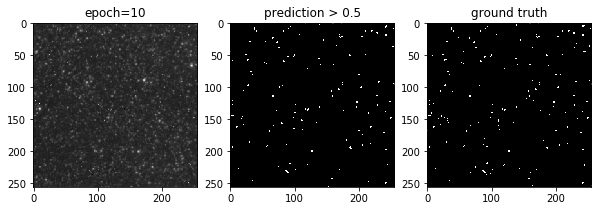

----------- epoch = 10 -----------
[TPR=0.772, FPR=0.002] @threshold = 0.5
loss = 0.0123

----------- epoch = 11 -----------
[TPR=0.770, FPR=0.002] @threshold = 0.5
loss = 0.0121

----------- epoch = 12 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0122

----------- epoch = 13 -----------
[TPR=0.772, FPR=0.002] @threshold = 0.5
loss = 0.0123

----------- epoch = 14 -----------
[TPR=0.775, FPR=0.002] @threshold = 0.5
loss = 0.0119

----------- epoch = 15 -----------
[TPR=0.768, FPR=0.001] @threshold = 0.5
loss = 0.0113

----------- epoch = 16 -----------
[TPR=0.767, FPR=0.001] @threshold = 0.5
loss = 0.0117

----------- epoch = 17 -----------
[TPR=0.758, FPR=0.001] @threshold = 0.5
loss = 0.0113

----------- epoch = 18 -----------
[TPR=0.758, FPR=0.001] @threshold = 0.5
loss = 0.0114

----------- epoch = 19 -----------
[TPR=0.768, FPR=0.001] @threshold = 0.5
loss = 0.0115



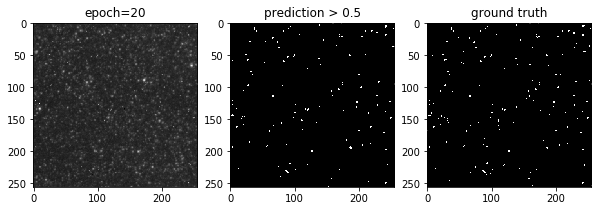

----------- epoch = 20 -----------
[TPR=0.762, FPR=0.001] @threshold = 0.5
loss = 0.0112

----------- epoch = 21 -----------
[TPR=0.755, FPR=0.001] @threshold = 0.5
loss = 0.0112

----------- epoch = 22 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0112

----------- epoch = 23 -----------
[TPR=0.757, FPR=0.001] @threshold = 0.5
loss = 0.0111
Saved to 2019-11-02_manta_1_epoch23.pth

----------- epoch = 24 -----------
[TPR=0.759, FPR=0.001] @threshold = 0.5
loss = 0.0113

----------- epoch = 25 -----------
[TPR=0.753, FPR=0.001] @threshold = 0.5
loss = 0.0113

----------- epoch = 26 -----------
[TPR=0.759, FPR=0.001] @threshold = 0.5
loss = 0.0112

----------- epoch = 27 -----------
[TPR=0.756, FPR=0.001] @threshold = 0.5
loss = 0.0110
Saved to 2019-11-02_manta_1_epoch27.pth

----------- epoch = 28 -----------
[TPR=0.762, FPR=0.001] @threshold = 0.5
loss = 0.0109
Saved to 2019-11-02_manta_1_epoch28.pth

----------- epoch = 29 -----------
[TPR=0.758, FPR=0.001] @threshold =

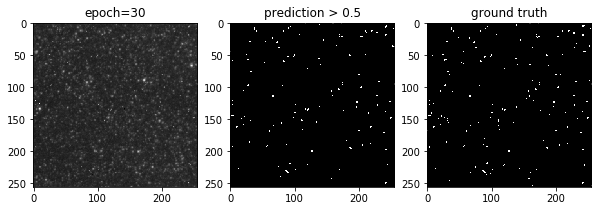

----------- epoch = 30 -----------
[TPR=0.763, FPR=0.001] @threshold = 0.5
loss = 0.0111

----------- epoch = 31 -----------
[TPR=0.758, FPR=0.001] @threshold = 0.5
loss = 0.0110

----------- epoch = 32 -----------
[TPR=0.760, FPR=0.001] @threshold = 0.5
loss = 0.0107
Saved to 2019-11-02_manta_1_epoch32.pth

----------- epoch = 33 -----------
[TPR=0.756, FPR=0.001] @threshold = 0.5
loss = 0.0108

----------- epoch = 34 -----------
[TPR=0.756, FPR=0.001] @threshold = 0.5
loss = 0.0111

----------- epoch = 35 -----------
[TPR=0.754, FPR=0.001] @threshold = 0.5
loss = 0.0107
Saved to 2019-11-02_manta_1_epoch35.pth

----------- epoch = 36 -----------
[TPR=0.766, FPR=0.001] @threshold = 0.5
loss = 0.0108

----------- epoch = 37 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0108
Epoch    36: reducing learning rate of group 0 to 5.0000e-04.

----------- epoch = 38 -----------
[TPR=0.763, FPR=0.001] @threshold = 0.5
loss = 0.0108

----------- epoch = 39 -----------
[TPR=0.763, F

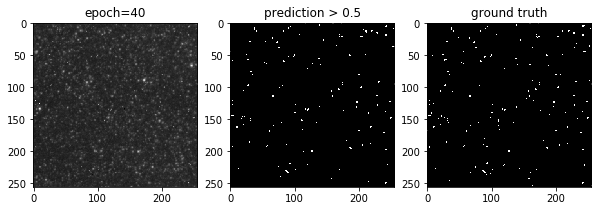

----------- epoch = 40 -----------
[TPR=0.764, FPR=0.001] @threshold = 0.5
loss = 0.0108

----------- epoch = 41 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0108

----------- epoch = 42 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0108

----------- epoch = 43 -----------
[TPR=0.766, FPR=0.001] @threshold = 0.5
loss = 0.0108

----------- epoch = 44 -----------
[TPR=0.766, FPR=0.001] @threshold = 0.5
loss = 0.0108
Epoch    43: reducing learning rate of group 0 to 5.0000e-05.

----------- epoch = 45 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 46 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 47 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 48 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 49 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109



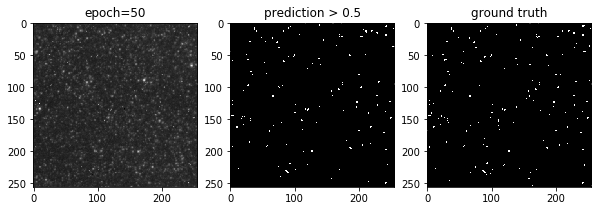

----------- epoch = 50 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 51 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109
Epoch    50: reducing learning rate of group 0 to 5.0000e-06.

----------- epoch = 52 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 53 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 54 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 55 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 56 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 57 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 58 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109
Epoch    57: reducing learning rate of group 0 to 5.0000e-07.

----------- epoch = 59 -----------
[TPR=0.765, FPR=0.001] @thresho

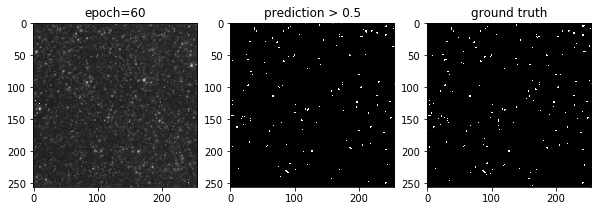

----------- epoch = 60 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 61 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 62 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 63 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 64 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 65 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109
Epoch    64: reducing learning rate of group 0 to 5.0000e-08.

----------- epoch = 66 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 67 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 68 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 69 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109



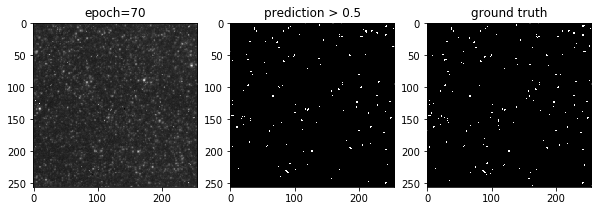

----------- epoch = 70 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109

----------- epoch = 71 -----------
[TPR=0.765, FPR=0.001] @threshold = 0.5
loss = 0.0109



In [ ]:
trainer = train(im_train, mask_train, ignore=ignore_train, name="manta_1", sky=sky_train, aug_sky=[-0.9, 3],
                epoch=250, save_after=20, plot_every=10, use_tqdm=False)
trainer.train()
filename = trainer.save()

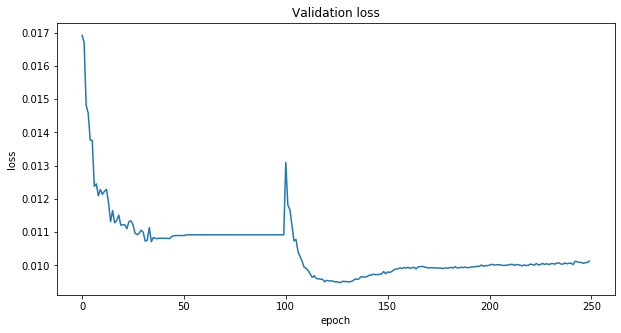

In [11]:
trainer.plot_loss()
#filename = trainer.save()

In [22]:
mdl = deepCR(mask='2019-11-03_manta_1_epoch250.pth', hidden=32)

(eg_tpr, eg_fpr), (eg_tpr_d, eg_fpr_d) = roc(mdl, image=eg_test[0], mask=eg_test[1], ignore=eg_test[2], dilate=True, rad=2)
(gc_tpr, gc_fpr), (gc_tpr_d, gc_fpr_d) = roc(mdl, image=gc_test[0], mask=gc_test[1], ignore=gc_test[2], dilate=True, rad=2)
(res_tpr, res_fpr), (res_tpr_d, res_fpr_d) = roc(mdl, image=res_test[0], mask=res_test[1], ignore=res_test[2], dilate=True, rad=2)


100%|██████████| 630/630 [14:43<00:00,  1.40s/it]

100%|██████████| 2310/2310 [57:46<00:00,  1.50s/it]

100%|██████████| 840/840 [19:51<00:00,  1.42s/it]


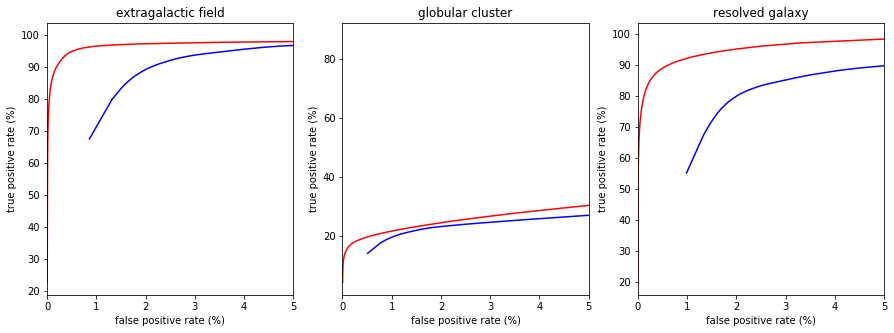

In [28]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

# Extragalactic field
x_max = 5
ax[0].plot(eg_fpr, eg_tpr, c="r")
ax[0].plot(eg_fpr_d, eg_tpr_d, c="b")
ax[0].set_xlim(0, x_max)
ax[0].set_title("extragalactic field")
ax[0].set_xlabel("false positive rate (%)")
ax[0].set_ylabel("true positive rate (%)")

# Globular cluster
ax[1].plot(gc_fpr, gc_tpr, c="r")
ax[1].plot(gc_fpr_d, gc_tpr_d, c="b")
ax[1].set_xlim(0, x_max)
ax[1].set_title("globular cluster")
ax[1].set_xlabel("false positive rate (%)")
ax[1].set_ylabel("true positive rate (%)")

# Resolved galaxy
ax[2].plot(res_fpr, res_tpr, c="r")
ax[2].plot(res_fpr_d, res_tpr_d, c="b")
ax[2].set_xlim(0, x_max)
ax[2].set_title("resolved galaxy")
ax[2].set_xlabel("false positive rate (%)")
ax[2].set_ylabel("true positive rate (%)")

plt.show()

In [17]:
# Test all of the data at once.
im_test = np.concatenate([eg_test[0], gc_test[0], res_test[0]])
mask_test = np.concatenate([eg_test[1], gc_test[1], res_test[1]])
ignore_test = np.concatenate([eg_test[2], gc_test[2], res_test[2]])
(tpr, fpr), (tpr_d, fpr_d)  = roc(mdl, image=im_test, mask=mask_test, ignore=ignore_test, dilate=True)


100%|██████████| 3780/3780 [1:13:43<00:00,  1.17s/it]


Text(0, 0.5, 'true positive rate (%)')

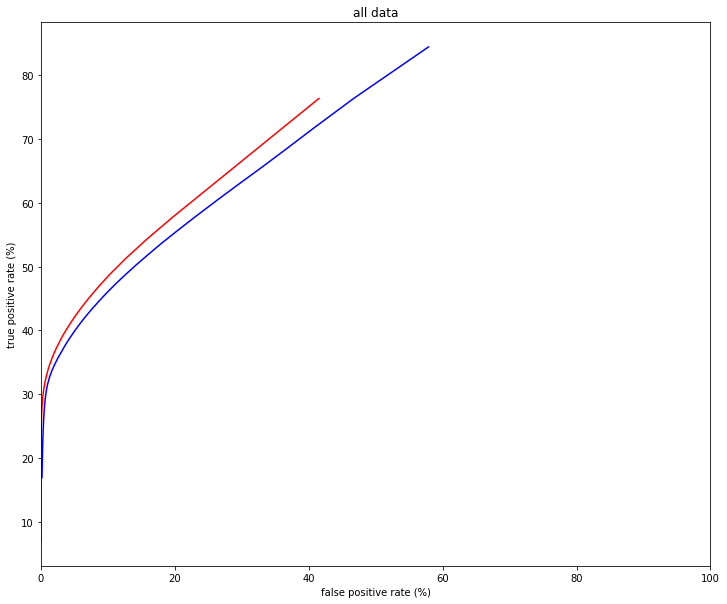

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.plot(fpr, tpr, c="r")
ax.plot(fpr_d, tpr_d, c="b")
ax.set_xlim(0,100)
ax.set_title("all data")
ax.set_xlabel("false positive rate (%)")
ax.set_ylabel("true positive rate (%)")

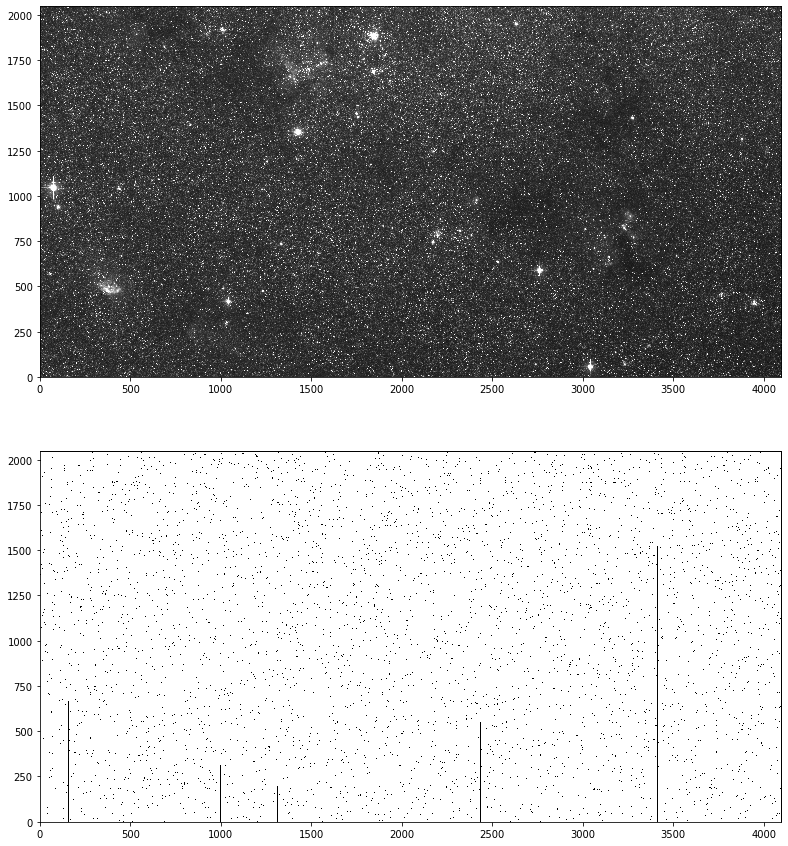

In [22]:
sci1 = fits.getdata(os.path.join(os.curdir, "data", "images", "j90o28fjq_flt.fits"))
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(15, 15)
ax[0].imshow(sci1, vmin=0, vmax=1000, cmap="gray", origin='lower')

sci2 = fits.getdata(os.path.join(os.curdir, "Drizzle Notebooks", "HST-10190-28", "j90o28fjq_sci2_single_mask.fits"))
ax[1].imshow(sci2, cmap="gray", origin='lower')
